<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [13]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [15]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [16]:
# текст запроса
query_3_1 = f''' select count(*) num_vacancies
             FROM vacancies
'''

In [17]:
# результат запроса
num_vacancies=pd.read_sql_query(query_3_1, connection)
num_vacancies

,num_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [18]:
# текст 
query_3_2 = f''' select count(*) num_employes
             FROM employers
'''

In [19]:
# результат запроса
num_employes=pd.read_sql_query(query_3_2, connection)
num_employes

,num_employes
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [20]:
# текст 
query_3_3 = f''' select count(*) num_region
             FROM areas
'''

In [21]:
# результат запроса
num_region=pd.read_sql_query(query_3_3, connection)
num_region

,num_region
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [22]:
# текст запроса
query_3_4 = f''' select count(*) num_industries
             FROM industries
'''

In [23]:
# результат запроса
num_industries=pd.read_sql_query(query_3_4, connection)
num_industries

,num_industries
0,294


***

In [ ]:
# выводы по предварительному анализу 
По предварительному анализу можно сделать выводы, что в базе вакансии представлены из разных регионов, всего их 1362. Работодателей почти вдвое меньше, чем представленных вакансий.Это значит что работодатели ищут разных специалистов.

SyntaxError: invalid syntax (3707286305.py, line 2)

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = f''' select a.name area, count(DISTINCT v.id) vacation
from areas a
left join vacancies v on a.id=v.area_id
where v.area_id is NOT null
group by a.name
ORDER BY 2 DESC
'''      

In [ ]:
# результат 
df_4_1=pd.read_sql_query(query_4_1, connection)
df_4_1

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\1299778469.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1=pd.read_sql_query(query_4_1, connection)


,area,vacation
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Шахтерск (Сахалинская область),1
765,Пестово,1
766,Пересвет,1
767,Первомайское (Ленинградская область),1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''select count(*) 
from vacancies v 
where salary_from IS NOT NULL OR salary_to IS NOT NULL
'''       

In [ ]:
# результат запроса
df_4_2=pd.read_sql_query(query_4_2, connection)
df_4_2

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\121011400.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2=pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст 
query_4_3 = f'''select round(AVG(v.salary_from)) AS "Среднее значение для нижней зп вилки", 
round(AVG(v.salary_to)) AS "Среднее значение для верхней зп вилки"
from vacancies v 
where salary_from IS NOT NULL OR salary_to IS NOT NULL
'''     

In [ ]:
# результат запроса
df_4_3=pd.read_sql_query(query_4_3, connection)
df_4_3

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\2578612900.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3=pd.read_sql_query(query_4_3, connection)


,Среднее значение для нижней зп вил,Среднее значение для верхней зп ви
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст 
query_4_4 = f'''select schedule, employment, count(*) 
FROM vacancies group by 1,2 order by 3 desc
'''     

In [ ]:
# результат запроса
df_4_4=pd.read_sql_query(query_4_4, connection)
df_4_4

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\2093589834.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4=pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
# текст запроса
query_4_5 = f'''select experience, count(*) FROM vacancies group by 1 order by 2 asc
'''

In [ ]:
# результат 
df_4_5=pd.read_sql_query(query_4_5, connection)
df_4_5

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\1581418024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5=pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [ ]:
# выводы по детальному анализу вакансий
1. В крупном городе вакансий больше (1 место = Москва).
2. Из 49197 вакансий, только у 24073 есть данные о зарплате.
3. Нихняя и верхняя границы зарплаты имеют большую разницу (36%).
4. Требуются больше всего работники на полную занятость и с опытом работы от 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f''' (SELECT e.name, count(*) as "1 and 5th place" 
FROM vacancies v join employers e on e.id = v.employer_id 
GROUP BY 1 
ORDER BY 2 DESC 
LIMIT 1 
OFFSET 0)
UNION(SELECT e.name, count(*) 
FROM vacancies v join employers e on e.id = v.employer_id 
GROUP BY 1 
ORDER BY 2 DESC 
LIMIT 1 
OFFSET 4) order by 2 desc
'''

In [ ]:
# результат запроса
df_5_1=pd.read_sql_query(query_5_1, connection)
df_5_1

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\108339062.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1=pd.read_sql_query(query_5_1, connection)


,name,1 and 5th place
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = f''' select a.name area, count(DISTINCT v.id) vacation, count(distinct e.id) company
from areas a
left join vacancies v on a.id=v.area_id
left join employers e on a.id=e.area
where v.area_id is null
group by a.name
order by 3 desc           
'''

In [ ]:
# результат запроса
df_5_2=pd.read_sql_query(query_5_2, connection)
df_5_2

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\3106936628.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2=pd.read_sql_query(query_5_2, connection)


,area,vacation,company
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = f''' SELECT e.name as employers, count(distinct v.area_id) as cnt_area
FROM employers e
join vacancies v on e.id = v.employer_id
GROUP BY 1
order by 2 desc
'''

In [ ]:
# результат запроса
df_5_3=pd.read_sql_query(query_5_3, connection)
df_5_3

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\3068986860.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3=pd.read_sql_query(query_5_3, connection)


,employers,cnt_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# текст 
query_5_4= f''' 
SELECT count(id)
FROM employers i left join employers_industries e on e.employer_id = i.id
where industry_id is Null
'''

In [ ]:
# результат запроса
df_5_4=pd.read_sql_query(query_5_4, connection)
df_5_4

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\4065701984.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4=pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# текст запроса
query_5_5= f''' 
SELECT name, count(distinct industry_id) as cnt
FROM employers_industries e join employers i on e.employer_id = i.id
group by 1
HAVING count(distinct industry_id) = 4
order by 1, 2 desc
limit 1 offset 2
'''

In [ ]:
# результат запроса
df_5_5=pd.read_sql_query(query_5_5, connection)
df_5_5

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\2670709187.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5=pd.read_sql_query(query_5_5, connection)


,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# текст запроса
query_5_6= f'''
SELECT count(id)
FROM employers_industries e join industries i on e.industry_id = i.id
where name like 'Разработка программного обеспечени%'
'''

In [ ]:
# результат запроса
df_5_6=pd.read_sql_query(query_5_6, connection)
df_5_6

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\992733747.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6=pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [25]:
# код для получения списка городов-милионников
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Находим таблицу с классом "standard"
table = soup.find('table', {'class': 'standard'})

cities = []
if table:
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 2:
            # Извлекаем название города из второй ячейки
            city_link = cells[1].find('a')
            if city_link:
                cities.append(city_link.get_text(strip=True))
else:
    print("Таблица с городами не найдена")
display(cities)

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Краснодар',
 'Самара',
 'Ростов-на-Дону',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [32]:
# текст запроса
# Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании,
# вместе с количеством вакансий в этих регионах.
# Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Находим таблицу с классом "standard"
table = soup.find('table', {'class': 'standard'})

cities = []
if table:
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 2:
            # Извлекаем название города из второй ячейки
            city_link = cells[1].find('a')
            if city_link:
                cities.append(city_link.get_text(strip=True))
else:
    print("Таблица с городами не найдена")

# display(cities)
cities_sql = ", ".join([f"'{i}'" for i in cities])
query_5_7= f''' (SELECT a.name, count(v.id)
FROM vacancies v
join areas a on v.area_id = a.id
join employers e on e.id = v.employer_id
where e.name = 'Яндекс' and a.name IN ({cities_sql})
group by 1
order by 2 asc)
union all
select 'Total', sum(rr.count) from (SELECT a.name, count(v.id)
FROM vacancies v
join areas a on v.area_id = a.id
join employers e on e.id = v.employer_id
where e.name = 'Яндекс' and a.name IN ({cities_sql})
group by 1
)rr
'''

In [33]:
# результат запроса
df_5_7=pd.read_sql_query(query_5_7, connection)
df_5_7

,name,count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

In [ ]:
# выводы по анализу работодателей
1. Яндекс находится на первом месте среди работодателей (1933 вакансии), Газпром нефть отстает на 82%.
2. Регион Россия реже всего указывают в вакансиях, за ним Казахстан.
3. Компании - Яндекс, Ростелеком больше всего охватывают регионов.
4. Сферу деятельности не указывают 8419 работодателей.
5. Компания 2ГИС имеют обширную сферу деятельности, 4 сферы деятельности.
6. 3553 компаний указали Разработку по в сфере своей деятельности
7. Компания Яндекс предствалена в городах миллионниках, общее количество вакансий 485

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
query_6_1 = f''' select count(v.name)
from vacancies v
where ((name ilike '%data%')
or (name ilike '%данн%'))  
'''

In [ ]:
# результат запроса
df_6_1=pd.read_sql_query(query_6_1, connection)
df_6_1

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\1944871394.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1=pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса
query_6_2 = f''' select count(v.name)
from vacancies v
where ((name ilike '%data scientist%') 
or (name ilike '%data science%') or (name ilike '%исследователь данных%') or ((name ilike '%ML%') AND (name not ilike '%HTML%')) OR (name ilike '%machine learning%') or (name ilike '%машинн%обучен%') and (key_skills is not null)) and (v.name ilike '%junior%' or v.experience ilike '%Нет опыта%' or v.employment ilike '%Стажировка%')
'''

In [ ]:
# результат запроса
df_6_2=pd.read_sql_query(query_6_2, connection)
df_6_2

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\364394858.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2=pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3 = f''' select v.id, v.key_skills
from vacancies v
where ((v.key_skills like '%SQL%') OR (v.key_skills ilike '%postgres%')) and ((name ilike '%data scientist%') 
or (name ilike '%data science%') or (name ilike '%исследователь данных%') or ((name ilike '%ML%') AND (name not ilike '%HTML%')) OR (name ilike '%machine learning%') or (name ilike '%машинн%обучен%') and (key_skills is not null))
'''

In [ ]:
# результат запроса
df_6_3=pd.read_sql_query(query_6_3, connection)
df_6_3

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\2815375476.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3=pd.read_sql_query(query_6_3, connection)


,id,key_skills
0,50533416,Python\tSQL\tРабота в команде\tOpenCV\tML
1,54824572,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...
2,55087887,Atlassian Jira\tФункциональное тестирование\tS...
3,55350407,Разработка ПО\tJavaScript\tSQL\tMySQL\tВеб-про...
4,55351147,Python\tSQL\tNLP\tScikit-learn\tMachine Learning
...,...,...
224,55451380,Git\tООП\tPostgreSQL\tBPMN\tBackend\tРабота с ...
225,54927911,Docker\tPHP\tYii\tElasticsearch\tMySQL\tПодбор...
226,55478561,Python\tLinux\tSQL\tPyTorch\tOpenCV\tKeras\tCa...
227,66125447,SCALA\tSQL\tМатематический анализ\tСтатистичес...


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4 = f''' select v.id, v.key_skills
from vacancies v
where (v.key_skills like '%Python%') and ((name ilike '%data scientist%') 
or (name ilike '%data science%') or (name ilike '%исследователь данных%') or ((name ilike '%ML%') AND (name not ilike '%HTML%')) OR (name ilike '%machine learning%') or (name ilike '%машинн%обучен%') and (key_skills is not null))
'''

In [ ]:
# результат запроса
df_6_4=pd.read_sql_query(query_6_4, connection)
df_6_4

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\3961698961.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4=pd.read_sql_query(query_6_4, connection)


,id,key_skills
0,50533416,Python\tSQL\tРабота в команде\tOpenCV\tML
1,54824572,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...
2,54825318,Python\tOpenCV\tTensorflow\tComputer Vision\tН...
3,66120847,Python\tFlask\tLinux\tAWS\tGit
4,55351147,Python\tSQL\tNLP\tScikit-learn\tMachine Learning
...,...,...
352,55478561,Python\tLinux\tSQL\tPyTorch\tOpenCV\tKeras\tCa...
353,55306481,Python\tАналитическое мышление\tАнализ данных\...
354,54918116,Python\tNumpy\tPyTorch\tPandas\tМатематический...
355,55185186,Python\tScikit-learn\tPandas\tGit\tNumpy


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
query_6_5 = f''' select round(avg (length(key_skills)-length (replace(key_skills, CHR(9),''))+1),2)
FROM vacancies v
where ((v.name ilike '%data scientist%') or (lower (v.name)ilike '%data science%') or (v.name ilike '%исследователь данных%') or (v.name like '%ML%' AND (v.name NOT ilike '%html%')) or (v.name ilike '%machine learning%') or (v.name ilike '%машинн%обучен%')
and (key_skills is not null))
'''

In [ ]:
# результат запроса
df_6_5=pd.read_sql_query(query_6_5, connection)
df_6_5

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\4152799029.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5=pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
query_6_6 = f''' select
v.experience, ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0)
from vacancies v
WHERE((v.name ILIKE '%data scientist%') OR (lower(v.name) ILIKE '%data science%') OR (v.name ILIKE '%исследователь данных%') OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%')) OR (v.name ILIKE '%machine learning%') 
OR (v.name ILIKE '%машинн%обучен%')
AND (key_skills IS NOT NULL))
GROUP BY v.experience
ORDER BY 1
'''

In [ ]:
# результат запроса
df_6_6=pd.read_sql_query(query_6_6, connection)
df_6_6

C:\Users\HP\AppData\Local\Temp\ipykernel_4876\3106953436.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6=pd.read_sql_query(query_6_6, connection)


,experience,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,145236.0
3,От 3 до 6 лет,243115.0


***

In [ ]:
# выводы по предметному анализу
Проанализировано 49197 вакансий.
1. 1771 вакансий (около 3.6%) связаны с "data" или "данными".
2. Наблюдается низкое количество вакансий для junior-специалистов (51).
3. Популярные навыки: SQL (229 вакансий), Python (357 вакансий).
4. В среднем в вакансиях указывается 6 ключевых навыков.
5. Средняя заработная плата составляет 243115 рублей.
6. Рекомендуется развивать навыки в области Data, в частности, SQL и Python.


# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
## Проведенное исследование вакансий в сфере Data позволило выявить ряд ключевых тенденций на рынке труда:
1. 3.6% вакансий напрямую связаны с "data" или "данными".
2. Низкое количество вакансий для junior-специалистов (51) говорит о нехватке кадров на начальном уровне.
3. Популярность SQL и Python: SQL и Python являются ключевыми навыками для специалистов в области Data.
4. Среднее количество ключевых навыков в вакансиях (6) говорит о высокой конкуренции на рынке труда.
5. Средняя заработная плата в сфере Data является достаточно высокой (243115 рублей).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

Дополнительные исследования показали:
1. самая высокая заррплата у разработчиков.
2. самая востребованная вакансия - системный администратор.
3. самый популярный работодатель(больше всего рабочих мест) -Москва.
Данных достаточно, чтобы проводить анализ по странам, отдельно по вакаксиям и работодателям.
Не лишним было бы провести еще работу с самими данными, поработать с их видом и структурой.


<Figure size 1200x800 with 0 Axes>

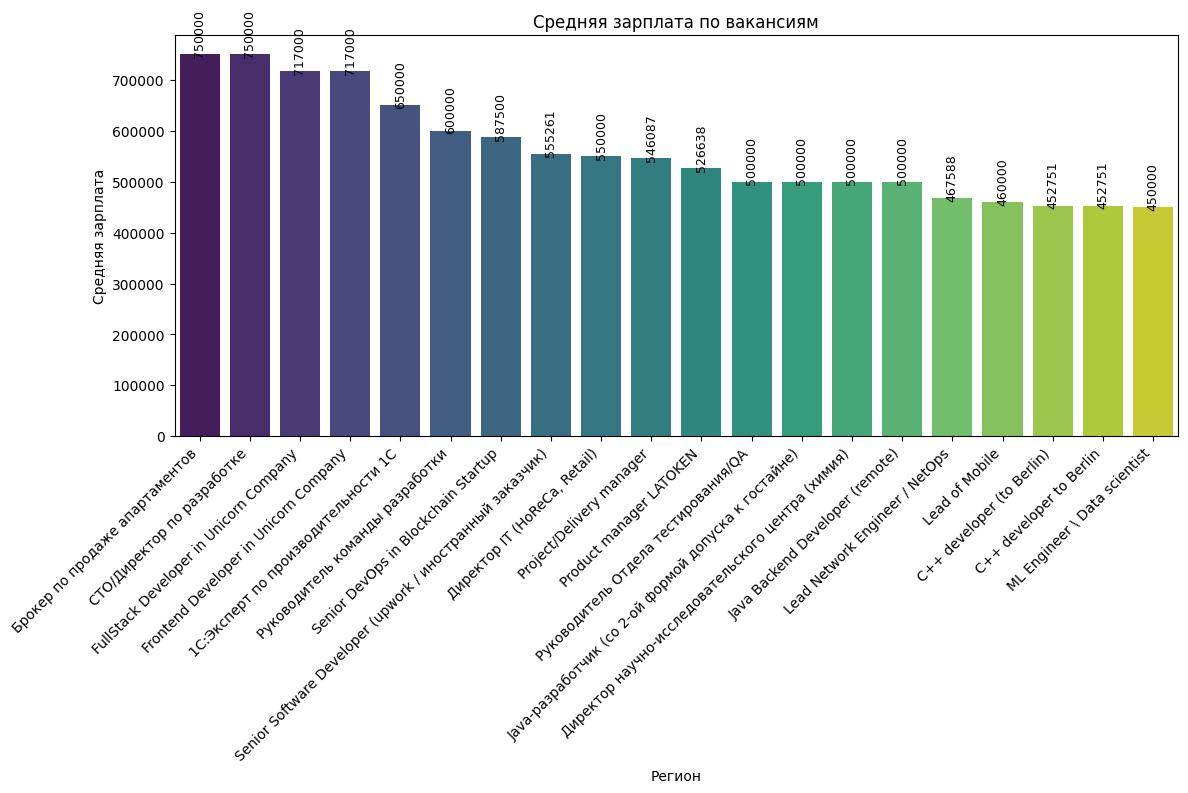

In [42]:
salary_by_region = pd.read_sql_query(f'''(
SELECT name AS region, ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary
FROM vacancies v

WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL

GROUP BY 1
ORDER BY avg_salary DESC
LIMIT 20)''', connection)

plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='region', y='avg_salary', data=salary_by_region, palette='viridis')


plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата по вакансиям')

plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{height:.0f}',
                 ha="center",  rotation=90,fontsize=9)

plt.tight_layout()
plt.show()

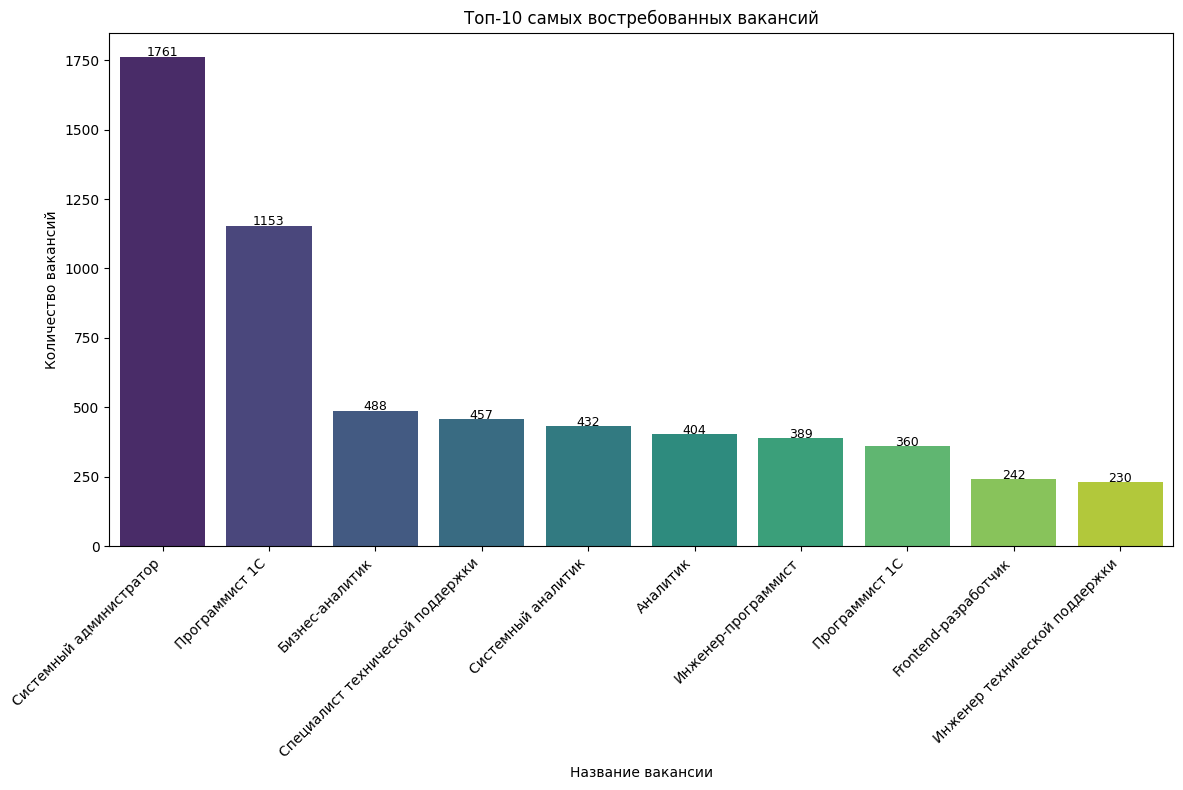

In [40]:
top_vacancies = pd.read_sql_query(
    '''SELECT name, count(*) AS vacancy_count
       FROM vacancies
       GROUP BY name
       ORDER BY vacancy_count DESC
       LIMIT 10''',
    connection
)

plt.figure(figsize=(12, 8))

barplot = sns.barplot(x='name', y='vacancy_count', data=top_vacancies, palette='viridis')

plt.xlabel('Название вакансии')
plt.ylabel('Количество вакансий')
plt.title('Топ-10 самых востребованных вакансий')

plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{int(height)}',
                 ha="center", fontsize=9)

plt.tight_layout()
plt.show()

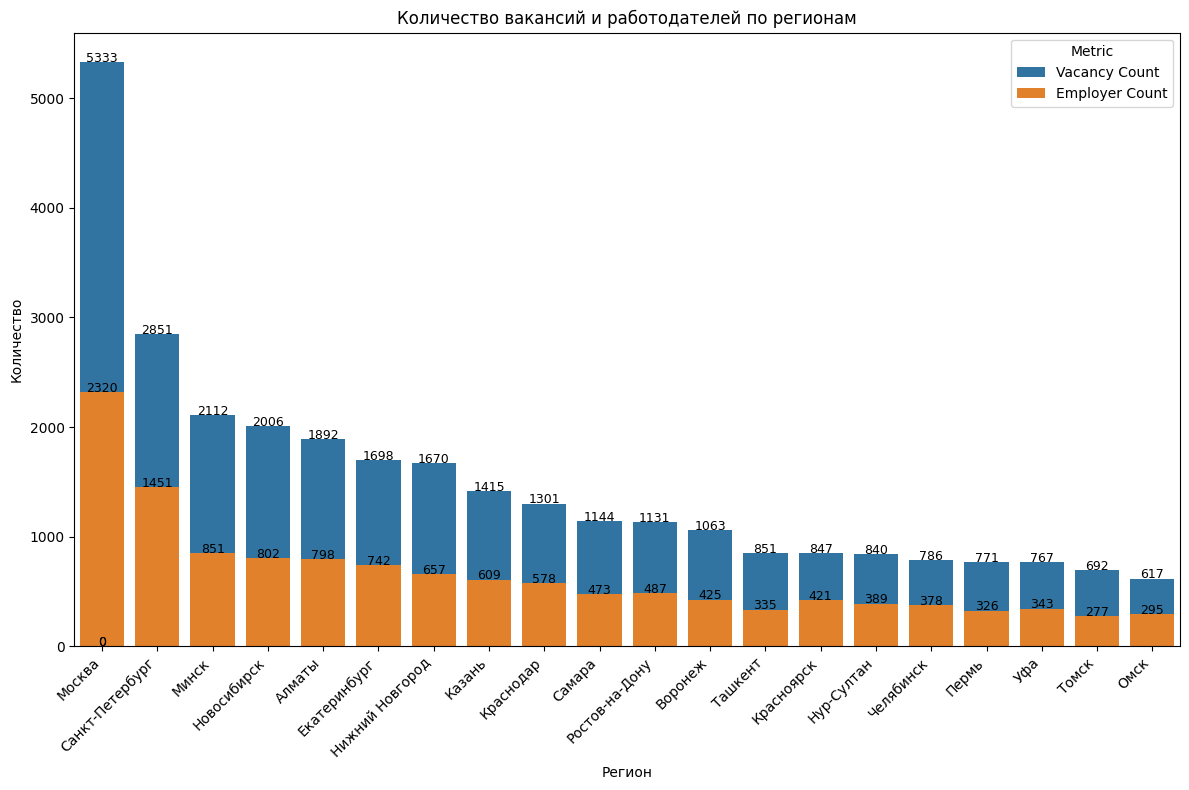

In [41]:
areas_top_vac = pd.read_sql_query(
    '''SELECT a.name, count(*) AS vacancy_count
       FROM areas a
       JOIN vacancies v ON a.id = v.area_id
       GROUP BY a.name
       ORDER BY vacancy_count DESC
       LIMIT 20''',
    connection
)

areas_top_employers = pd.read_sql_query(
    '''SELECT a.name, count(DISTINCT e.id) AS employer_count
       FROM areas a
       JOIN vacancies v ON a.id = v.area_id
       JOIN employers e ON v.employer_id = e.id
       GROUP BY a.name
       ORDER BY employer_count DESC
       LIMIT 20''',
    connection
)

# Объединим базы
merged_data = pd.merge(areas_top_vac, areas_top_employers, on='name', how='outer').fillna(0).sort_values('vacancy_count', ascending=False)


# Переделаем для графика
data_for_plot = pd.DataFrame({
    'Region': merged_data['name'],
    'Vacancy Count': merged_data['vacancy_count'],
    'Employer Count': merged_data['employer_count']
})

data_melted = pd.melt(data_for_plot, id_vars=['Region'],
                     value_vars=['Vacancy Count', 'Employer Count'],
                     var_name='Metric', value_name='Count')


plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=data_melted, x='Region', y='Count', hue='Metric', orient='v', ci=None, dodge=False)

# Подпишем график
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.title('Количество вакансий и работодателей по регионам')
plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{int(height)}',
                 ha="center", fontsize=9)

plt.tight_layout()
plt.show()